In [71]:
#importing the libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [73]:
#Loading the dataset
elecom = pd.read_csv('Electric_Production.csv' , parse_dates=['DATE'] , index_col='DATE')

In [74]:
elecom = elecom[:len(elecom)-2]

In [75]:
elecom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 395 entries, 1985-01-01 to 2017-11-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   387 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [76]:
#Checking for null values
elecom.isnull().sum()

Value    8
dtype: int64

### Dealing with Missing Observations

In Time Series Analysis, we cannot impute the missing values with global mean or median because the time series data might have some seasonality or trend and therefore, these methods can cause biasness to the data. 
Rather we would be using the interpolate function for imputations. Linear Interpolation simply means to estimate a missing value by connecting dots in a straight line in increasing order. In short, It estimates the unknown value in the same increasing order from previous values. The default method used by Interpolation is Linear. So while applying it, we need not specify it.

In [7]:
elecom_inter = elecom.interpolate(method='linear')

In [8]:
#Checking for null values
elecom_inter.isnull().sum()

Value    0
dtype: int64

<Axes: xlabel='DATE'>

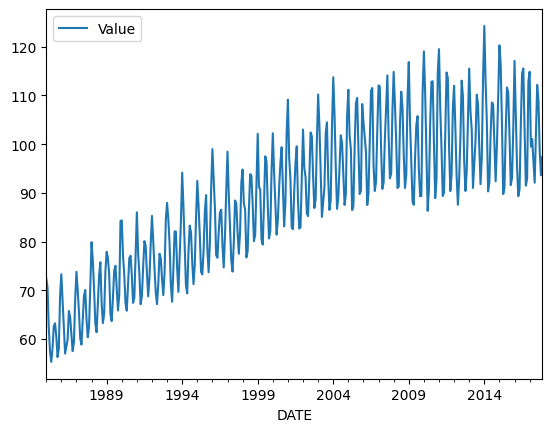

In [9]:
elecom_inter.plot()

Before proceeding towards Time Series Decomposition, we need to decide weather the model is Additive or Multiplicative. We observe that the magnitude of seasional fluctuations increases over time, hence it is a Multiplicative model. Now, we can convert a Multiplicative Model into a Additive Model by simply taking the logarithms of the observations.

In [29]:
data = elecom_inter.copy()
data['Value'] = np.log(elecom_inter['Value'])

<Axes: xlabel='DATE'>

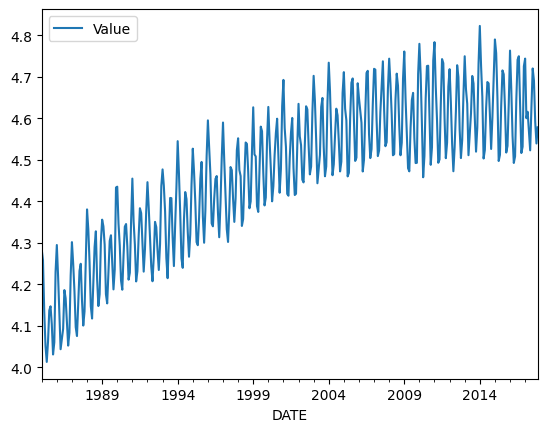

In [30]:
data.plot()

### Time Series Decomposition :

###### Time series decomposition is a technique used to break down a time series into its underlying components:
1) Trend: The trend component represents the long-term direction or movement of the time series.
2) Seasonality: The seasonality component represents the repetitive patterns or fluctuations that occur within a fixed period, such as daily, weekly, monthly, or yearly.
3) Residual (or Error): The residual component represents the remaining variation in the data that cannot be attributed to the trend or seasonality. It includes any random or unpredictable fluctuations

In [12]:
decomposition = seasonal_decompose(data['Value'] , model= 'multiplicative')

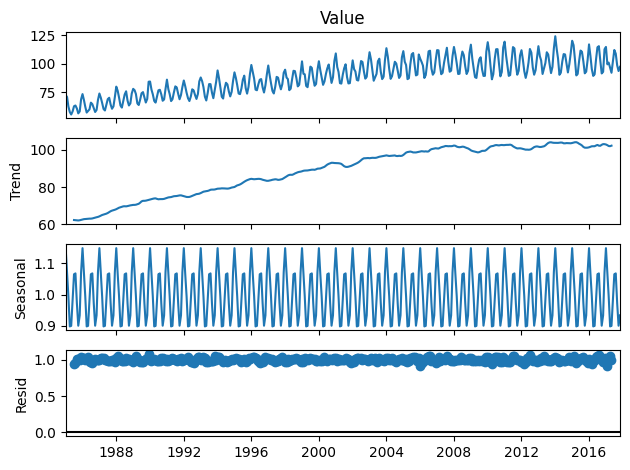

In [13]:
plot = decomposition.plot()

<Axes: xlabel='DATE'>

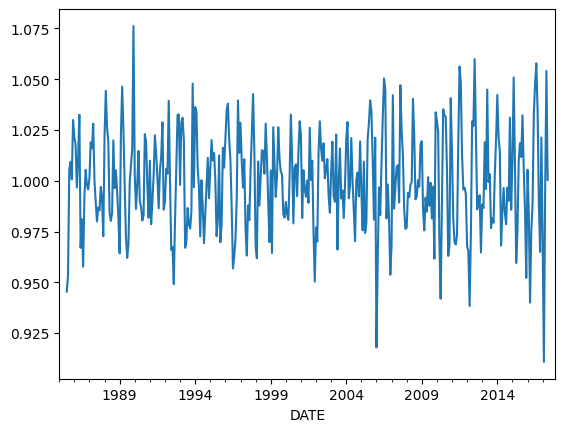

In [14]:
resid = decomposition.resid
resid.plot()

In [15]:
def adfuller_test(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic' , 'p-value' , '#Lags Used' , 'Number of Observations Used']
    for value,label in zip(result , labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")

In [16]:
adfuller_test(resid.dropna())

ADF Test Statistic : -9.490770419904837
p-value : 3.657936318338964e-16
#Lags Used : 14
Number of Observations Used : 368
reject null hypothesis


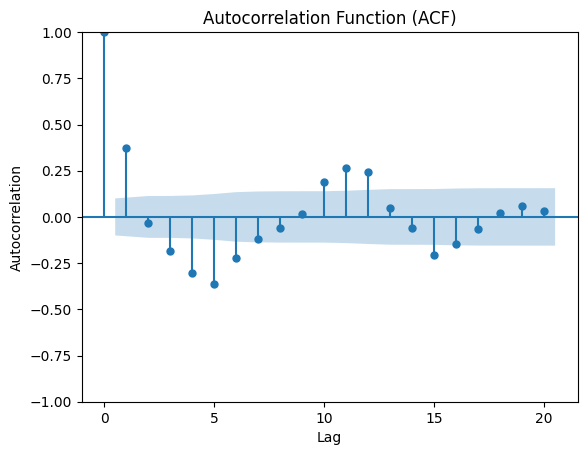

In [17]:
#plot of ACF

plot_acf(resid.dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

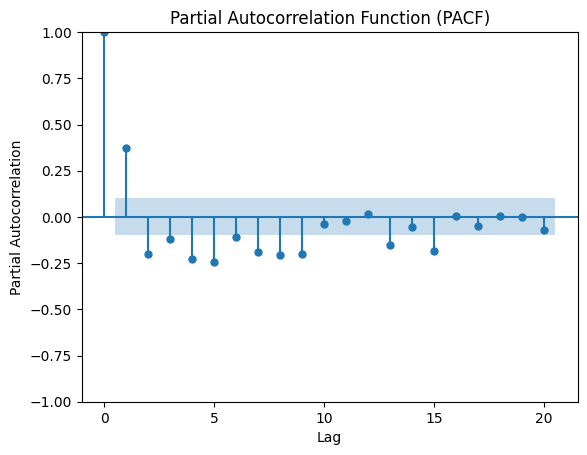

In [18]:
#plot of PACF

plot_pacf(resid.dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### Fitting of ARMA Model

In [158]:
# Create an instance of the ARMA model with appropriate order values
model = ARIMA(resid, order=(1, 0 , 1))  # Replace p and q with desired order values

# Fit the model to the data
model_fit = model.fit()

In [159]:
predictions = model_fit.predict(start= 350, end=len(data))

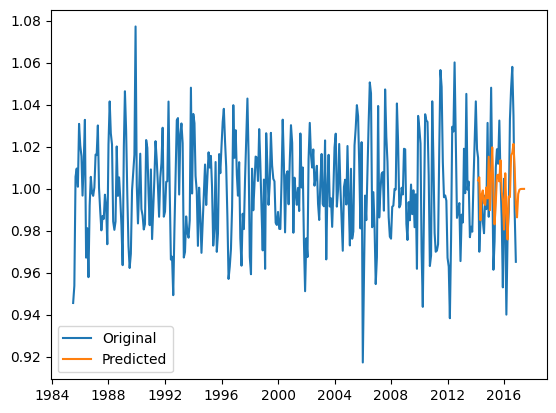

In [160]:
plt.plot(resid, label='Original')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()